# **Sesión 2. Módulo 2.**  
# **Python Scientific Stack**  

El término **Python Scientific Stack** es una manera genérica de referirse al conjunto de liberías de python que se utilizan en el contexto científico. Más especificamente, denota librerias orientadas a la manipulación, modelización, visualización y análisis de grandes cantidades de datos (aunque no se quejan si les proporcionamos los datos en pequeñas cantidades!).

Las librerías principales que se engloban dentro de este término son numpy, scipy, pandas, matplotlib, seaborn, y scikit. Hay muchas más tan importantes como las anteriores en determinados contextos, pero en este curso nos vamos a centrar en adquirir una perspectiva general de las dos librerías que podrían ser de más utilidad en el ámbito de la psicología: pandas y seaborn. 

Sin embargo, hay una librería fundamental a todo el trabajo computacional que se hace en python que es necesario conocer: numpy.

## **1. NumPy**  

NumPy (Numerical Python) es una biblioteca de código abierto que representa el estándar para trabajar con datos  masivos en Python. Por esto es el núcleo del ecosistema científico en Python, permitiendo implementar algoritmos numéricos a una velocidad comparable a código C o FORTRAN.    

### **1.1 NumPy Arrays**  

Los arrays de NumPy forman la estructura de datos subyacente para la mayor parte del trabajo computacional en Python, y Pandas lo utiliza de forma extensiva. Aquí sólo daremos una breve visión general.

Un array es una malla de valores homogéneos que además contiene información (metadatos) sobre los datos en bruto, cómo localizar un elemento, y cómo interpretar un elemento.  

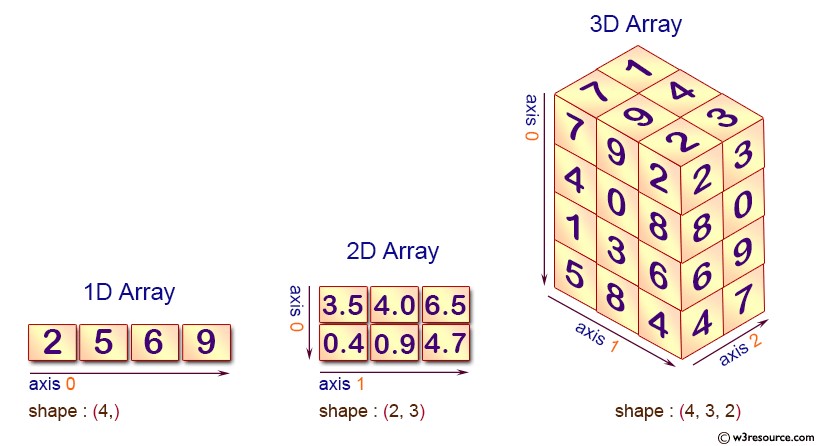

Un array puede ser indexado por una tupla de enteros no negativos, por booleanos, por otro array o por enteros. El **rango (range)** de la matriz es el número de dimensiones. La **forma (shape)** de la matriz es una tupla de enteros que indica el tamaño de la matriz en cada dimensión. En NumPy, las dimensiones se llaman **ejes (axes)**. 

### **1.2. ¿Cuál es la diferencia entre una lista Python y un array NumPy?**  

Mientras que una lista Python puede contener diferentes tipos de datos dentro de una misma lista, todos los elementos de un array NumPy deben ser homogéneos. 

Los arrays de NumPy son más rápidos y compactos que las listas de Python. Un array consume menos memoria y es cómodo de usar. Vamos a comprobando calculando el cuadrado de un vector:

In [23]:
import random
import numpy as np

vector_py = [random.random() for i in range(50000)]
vector_np = np.random.random(50000)


In [24]:
vector_np.size * 4 / (1024)**3

0.0001862645149230957

In [25]:
%timeit [e**2 for e in vector_py]

8.74 ms ± 97.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%timeit vector_np**2

34 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [27]:
print("Por tanto, la potenciación de matrices en numpy es %d veces más rápida que utilizando pure python" % (8.58e-3 / 33.2e-6) )

Por tanto, la potenciación de matrices en numpy es 258 veces más rápida que utilizando pure python


### **1.3. ¿Cómo crear arrays NumPy?**  
En primer lugar debemos importar la librería NumPy para poder utilizarla. La convención para importarla es la siguiente:

In [ ]:
import numpy as np

Una vez importado, podemos acceder a sus funciones como miembros del nombre `np`

La manera más básica de crear un array NumPy, es utilizar la función `np.array()`, que toma una lista como valor de entrada.

In [ ]:
a = np.array([1, 2, 3])
a

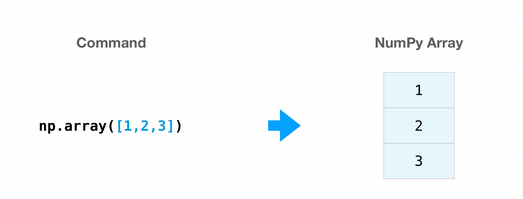

Existen muchos otros métodos para crear arrays. A continuación veremos ejemples utilizando las funciones `np.zeros()`, `np.ones()`, `np.empty()`, `np.arange()`, `np.linspace()`

In [28]:
np.zeros(2)

array([0., 0.])

In [29]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
np.ones(2)

array([1., 1.])

In [31]:
np.empty(2) 

array([1., 1.])

In [32]:
np.arange(4)

array([0, 1, 2, 3])

In [33]:
np.arange(2, 9, 2)

array([2, 4, 6, 8])

In [34]:
np.linspace(0, 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [35]:
np.ones(2, dtype=np.int64)

array([1, 1])

### **1.4. Propiedades más relevantes de NumPy arrays**  

Un array es un objeto complejo con una larga lista de métodos y propiedades. En esta sección veremos simplemente las propiedades más fundamentales de un array: `ndim`, `size`, `shape`.  Para ello utilizaremos un array de ejemplo creado en la siguiente celda.  

In [36]:
array_example = np.array([[[0, 1, 2, 3],

                           [4, 5, 6, 7]],

                          [[0, 1, 2, 3],

                           [4, 5, 6, 7]],

                          [[0 ,1 ,2, 3],

                           [4, 5, 6, 7]]])
array_example

array([[[0, 1, 2, 3],
        [4, 5, 6, 7]],

       [[0, 1, 2, 3],
        [4, 5, 6, 7]],

       [[0, 1, 2, 3],
        [4, 5, 6, 7]]])

In [37]:
array_example.ndim

3

In [38]:
array_example.size

24

In [39]:
array_example.shape

(3, 2, 4)

### **1.5. Indexado y recortado (slicing) de NumPy arrays**  

Puedes indexar y cortar arrays NumPy de la misma forma que las listas Python.

In [40]:
data = np.array([1, 2, 3])
data[1]

2

In [41]:
data[0:2]

array([1, 2])

In [42]:
data[1:]

array([2, 3])

In [43]:
data[-2:]

array([2, 1])

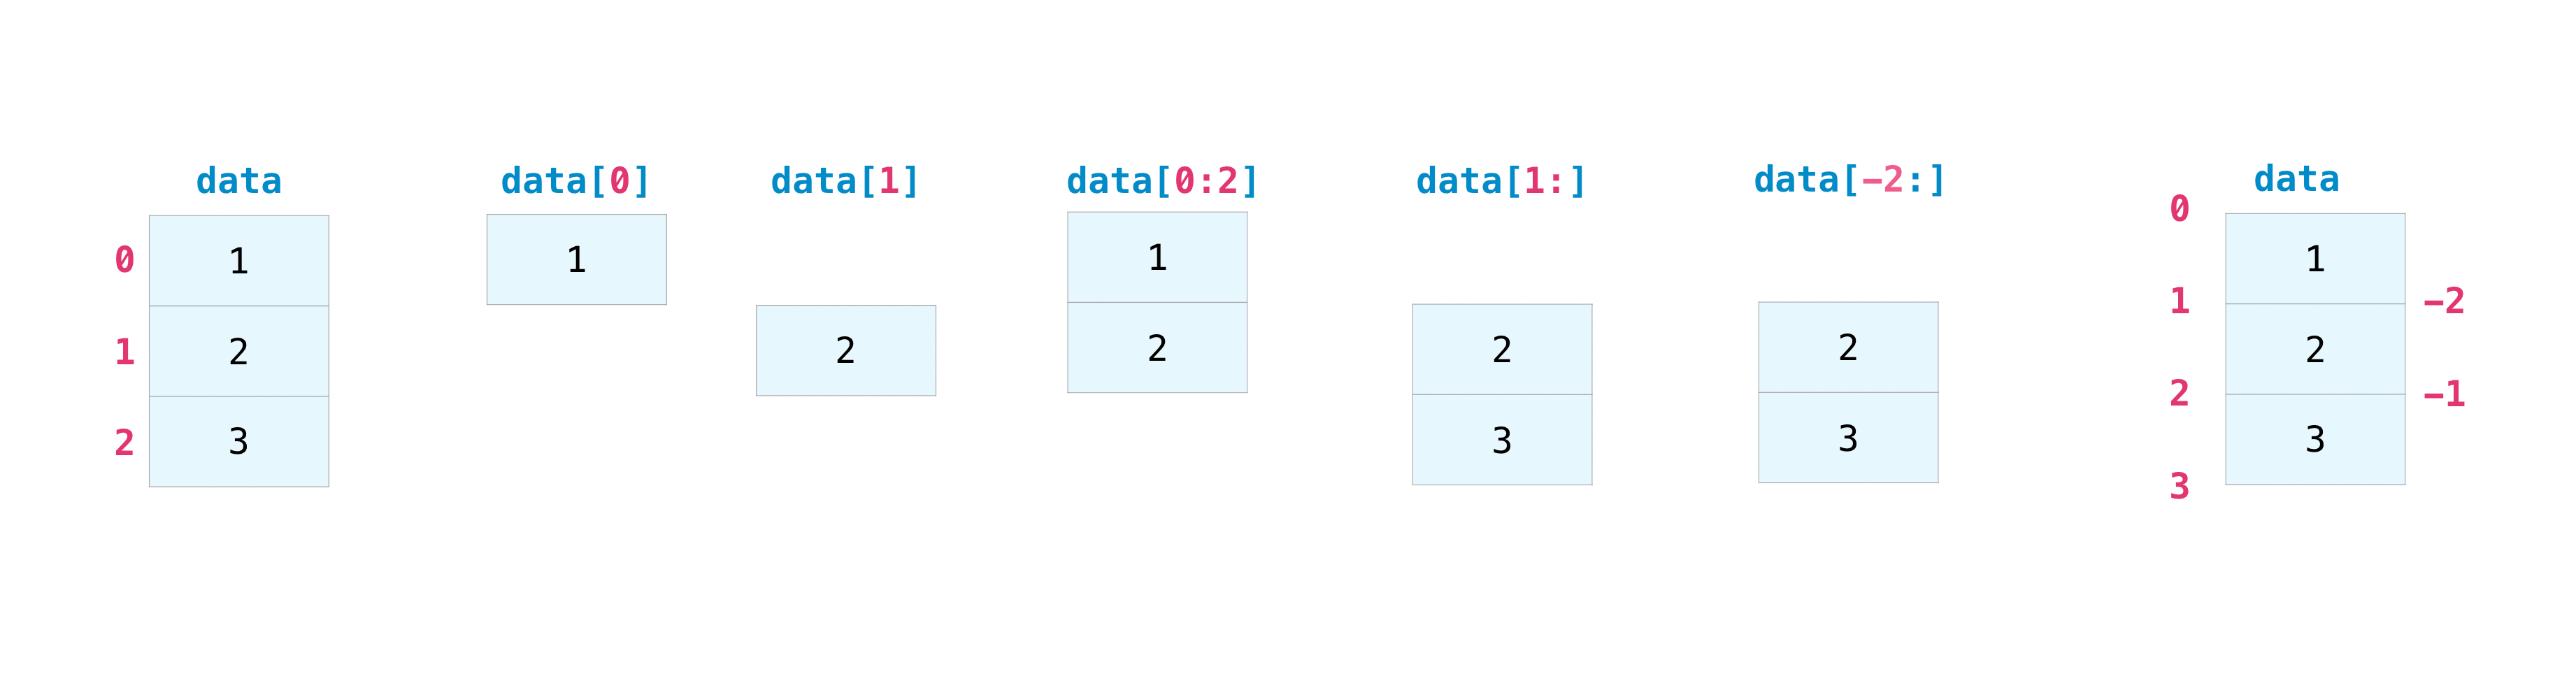

### **1.6. Operaciones más utiles con NumPy arrays**  

NumPy también realiza funciones de agregación. Además de `min`, `max`, y `sum`, puede ejecutar fácilmente `mean` para obtener la media, `prod` para obtener el resultado de multiplicar los elementos juntos, `std` para obtener la desviación estándar, y más.

In [49]:
data

array([1, 2, 3])

In [47]:
data.max()

3

In [48]:
data.min()

1

In [50]:
data.sum()

6

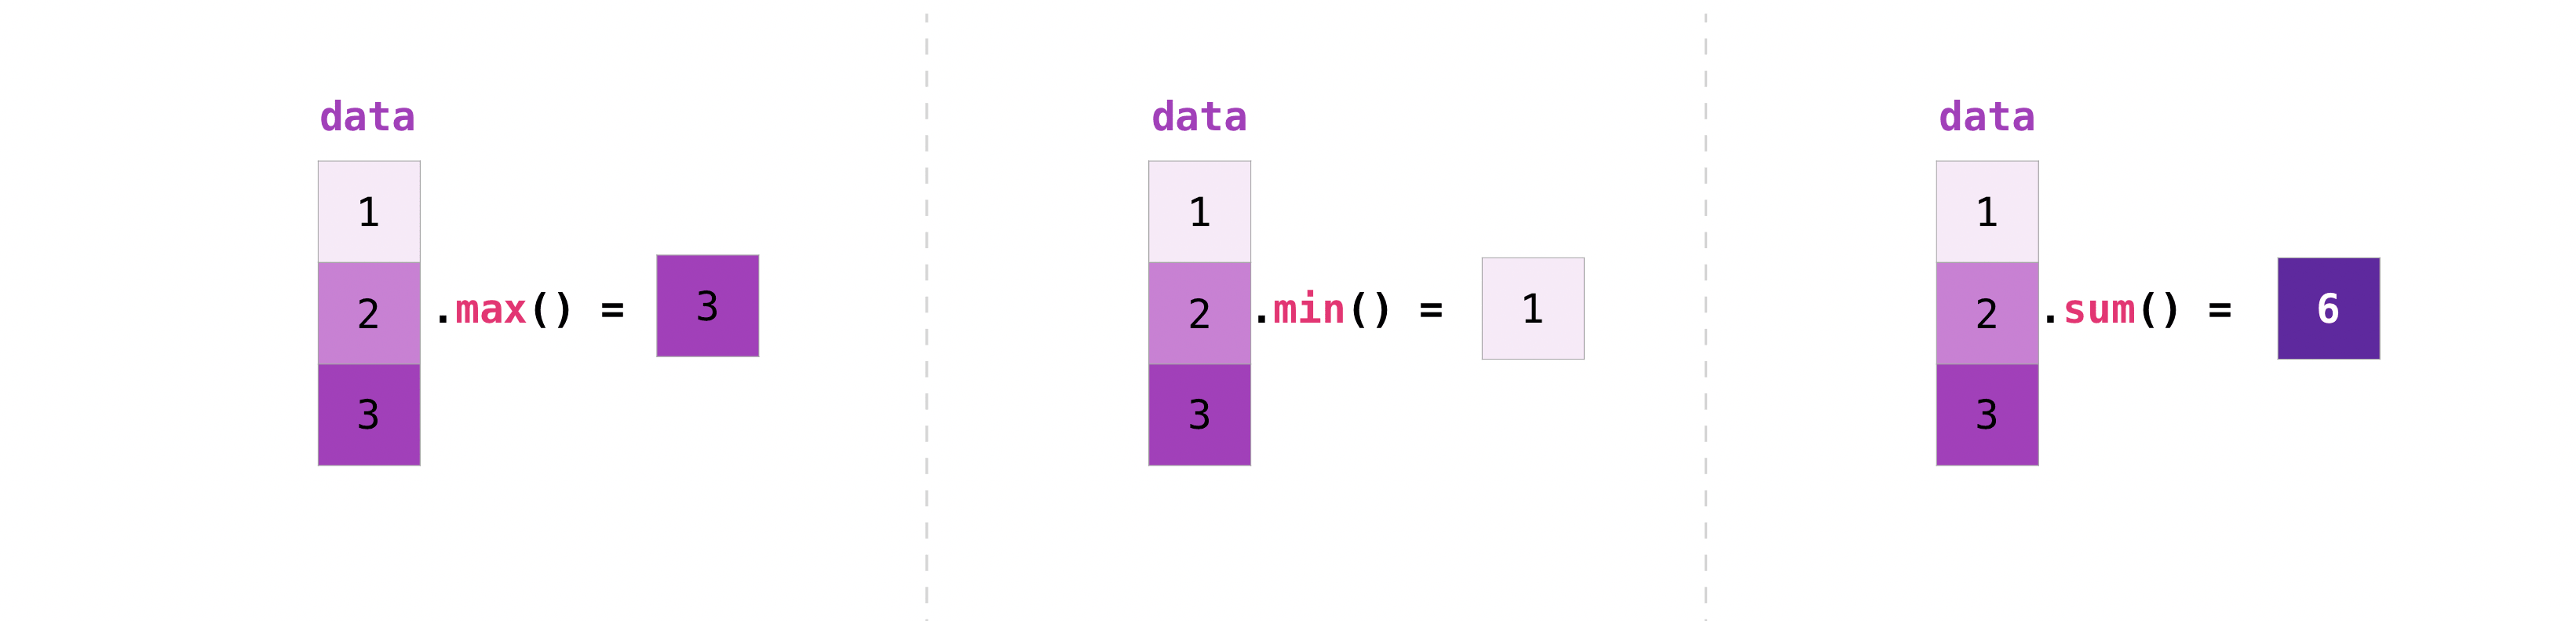

Para mostrar mejor la utilidad de estos métodos, vamos a partir de un array un poco más interesante.

In [51]:
a = np.array([[0.45053314, 0.17296777, 0.34376245, 0.5510652],
              [0.54627315, 0.05093587, 0.40067661, 0.55645993],
              [0.12697628, 0.82485143, 0.26590556, 0.56917101]])

In [56]:
a.shape

(3, 4)

In [53]:
a.min()

0.05093587

In [54]:
a.min(axis=0)

array([0.12697628, 0.05093587, 0.26590556, 0.5510652 ])

In [55]:
a.min(axis=1)

array([0.17296777, 0.05093587, 0.12697628])

In [ ]:
a.

In [ ]:
a.std(axis=1)

## **2. Pandas: `DataFrames` y `Series`**  
Pandas es una biblioteca útil para el análisis de datos. Para ello, Pandas proporciona dos estructuras de datos potentes y relativamente fáciles de usar: `DataFrames` y `Series`.

Para poder utilizar las funciones de la librería Pandas, antes debemos importarla al igual que numpy. La convención para hacerlo es:

In [ ]:
import pandas as pd
import numpy as np

Una vez importada, podemos acceder a sus funciones como miembros del nombre `pd`.

### **2.1. ¿Qué es un Pandas DataFrame?**

Un DataFrame de Pandas es básicamente una tabla de datos, en la que las columnas representab distintas variables, y las filas los distintos casos de cada variable. Por esto, los DataFrames son la estructura de datos básica para el trabajo estadístico con datos.  

In [57]:
df = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20220102'),
                    'C' : np.random.randn(6),
                    'D' : np.array([3] * 6,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train","test","train"]),
                    'F' : 'foo' })
df

,A,B,C,D,E,F
0,1.0,2022-01-02,0.310735,3,test,foo
1,1.0,2022-01-02,0.845614,3,train,foo
2,1.0,2022-01-02,0.432833,3,test,foo
3,1.0,2022-01-02,1.153785,3,train,foo
4,1.0,2022-01-02,0.099610,3,test,foo
5,1.0,2022-01-02,0.722896,3,train,foo


Los `DataFrames` soportan el uso de fechas como índices, lo que facilita enormemente el uso de datos longitudinales:

In [60]:
dates = pd.date_range('20210101',periods=6)
data = { 'A' : 1.,
                    'B' : pd.Timestamp('20220102'),
                    'C' : np.random.randn(6),
                    'D' : np.array([3] * 6,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train","test","train"]),
                    'F' : 'foo' }

df = pd.DataFrame(data, index = dates )
data
df

,A,B,C,D,E,F
2021-01-01,1.0,2022-01-02,0.149324,3,test,foo
2021-01-02,1.0,2022-01-02,1.264444,3,train,foo
2021-01-03,1.0,2022-01-02,1.644482,3,test,foo
2021-01-04,1.0,2022-01-02,-0.662018,3,train,foo
2021-01-05,1.0,2022-01-02,-0.091073,3,test,foo
2021-01-06,1.0,2022-01-02,-0.007394,3,train,foo


Cada una de estas columnas tiene su tipo de datos, como podemos comprobar accediendo a la propiedad `dtypes` del `DataFrame`:

In [62]:
df.dtypes

A           float64
B    datetime64[ns]
C           float64
D             int32
E          category
F            object
dtype: object

### **2.2. ¿Qué es un Pandas `Series`?**  

Una serie es una estructura de datos unidimensional, puede entenderse como cada una de las columnas de una tabla. Su nombre proviene de la series temporales. 

Puede contener cualquier tipo de datos:  enteros, flotantes y cadenas. Es útil cuando se desea realizar un cálculo o devolver un vector unidimensional. Una serie, por definición, no puede tener múltiples columnas. Para este caso existe el `DataFrame`.

In [63]:
pd.Series([1., 2., 3.])

0    1.0
1    2.0
2    3.0
dtype: float64

De manera análoga a los `DataFrames`, las `Series` de Pandas soportan el uso de fechas como índices:

In [65]:
dates = pd.date_range('20210101', periods=6)
pd.Series(np.random.randn(6),index=dates,dtype='float32')

2021-01-01   -0.212412
2021-01-02   -0.536800
2021-01-03    1.485013
2021-01-04   -0.470931
2021-01-05    0.751929
2021-01-06    0.872431
Freq: D, dtype: float32

### **2.3. Visualización de los datos**  

Pandas posee muchos métodos comunes (o similares) con el lenguaje R para visualizar y manipular datos. En general en Pandas se accede a éstos utilizando la notación `.`, es decir, son literalmente métodos de los `DataFrames` y `Series`. 

Por ejemplo, para mostrar las primeras filas de una tabla usamos el método `head`:

In [66]:
df.head()

,A,B,C,D,E,F
2021-01-01,1.0,2022-01-02,0.149324,3,test,foo
2021-01-02,1.0,2022-01-02,1.264444,3,train,foo
2021-01-03,1.0,2022-01-02,1.644482,3,test,foo
2021-01-04,1.0,2022-01-02,-0.662018,3,train,foo
2021-01-05,1.0,2022-01-02,-0.091073,3,test,foo


Y para mostrar las últimas filas de una tabla usamos el método `tail`, en este caso le pasamos un parámetro para poder especificar cuantas lineas queremos visualizar:

In [67]:
df.tail(3)

,A,B,C,D,E,F
2021-01-04,1.0,2022-01-02,-0.662018,3,train,foo
2021-01-05,1.0,2022-01-02,-0.091073,3,test,foo
2021-01-06,1.0,2022-01-02,-0.007394,3,train,foo


También son propiedades de las `Series` y `DataFrames` el índice, las columnas o los valores subyacentes a la tabla:

In [68]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [69]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [70]:
df.values

array([[1.0, Timestamp('2022-01-02 00:00:00'), 0.1493240400215246, 3,
        'test', 'foo'],
       [1.0, Timestamp('2022-01-02 00:00:00'), 1.2644436999652646, 3,
        'train', 'foo'],
       [1.0, Timestamp('2022-01-02 00:00:00'), 1.6444821280502513, 3,
        'test', 'foo'],
       [1.0, Timestamp('2022-01-02 00:00:00'), -0.6620176872295983, 3,
        'train', 'foo'],
       [1.0, Timestamp('2022-01-02 00:00:00'), -0.09107268651687207, 3,
        'test', 'foo'],
       [1.0, Timestamp('2022-01-02 00:00:00'), -0.007393685389682029, 3,
        'train', 'foo']], dtype=object)

Podemos acceder a un breve resumen de los datos presentes en un `DataFrame` accediendo a su método `describe`

In [71]:
df.describe()

,A,C,D
count,6.0,6.000000,6.0
mean,1.0,0.382961,3.0
std,0.0,0.882281,0.0
min,1.0,-0.662018,3.0
25%,1.0,-0.070153,3.0
50%,1.0,0.070965,3.0
75%,1.0,0.985664,3.0
max,1.0,1.644482,3.0


Igualmente hay multiples formas de ordenar los datos de un `DataFrame`, en este ejemplo lo hacemos en función de los valores de una columna, en orden creciente:

In [72]:
df.sort_values('C')

,A,B,C,D,E,F
2021-01-04,1.0,2022-01-02,-0.662018,3,train,foo
2021-01-05,1.0,2022-01-02,-0.091073,3,test,foo
2021-01-06,1.0,2022-01-02,-0.007394,3,train,foo
2021-01-01,1.0,2022-01-02,0.149324,3,test,foo
2021-01-02,1.0,2022-01-02,1.264444,3,train,foo
2021-01-03,1.0,2022-01-02,1.644482,3,test,foo


### **2.4. Selección de los datos**  

El indexado de `DataFrames` en Pandas es un tema avanzado ya que es uno de los puntos fuertes de esta librería. Pandas ofrece múltiples posibilidades, algunas de ellas muy sofisticadas. Aqui vamos a ver tres maneras sencillas de acceder a columnas, filas, o subconjuntos de filas y columnas.

En primer lugar, podemos utilizar el `DataFrame` como un diccionario para obtener una o varias columnas (cada columna por separado es una `Series`):

In [73]:
df['A']

2021-01-01    1.0
2021-01-02    1.0
2021-01-03    1.0
2021-01-04    1.0
2021-01-05    1.0
2021-01-06    1.0
Freq: D, Name: A, dtype: float64

In [74]:
df[['B','C']]

,B,C
2021-01-01,2022-01-02,0.149324
2021-01-02,2022-01-02,1.264444
2021-01-03,2022-01-02,1.644482
2021-01-04,2022-01-02,-0.662018
2021-01-05,2022-01-02,-0.091073
2021-01-06,2022-01-02,-0.007394


Para seleccionar una o varias filas, podemos utilizar los valores del índice del `DataFrame`: 

In [75]:
df['20210101':'20210101']

,A,B,C,D,E,F
2021-01-01,1.0,2022-01-02,0.149324,3,test,foo


In [76]:
df['20210101':'20210103']

,A,B,C,D,E,F
2021-01-01,1.0,2022-01-02,0.149324,3,test,foo
2021-01-02,1.0,2022-01-02,1.264444,3,train,foo
2021-01-03,1.0,2022-01-02,1.644482,3,test,foo


Para concluir esta breve sección, podemos seleccionar partes de un `DataFrame` utilizando posiciones numéricas en sus dos dimensiones utilizando el método `iloc`:

In [77]:
df.iloc[3]

A                    1.0
B    2022-01-02 00:00:00
C              -0.662018
D                      3
E                  train
F                    foo
Name: 2021-01-04 00:00:00, dtype: object

In [78]:
df.iloc[3:5,0:2]

,A,B
2021-01-04,1.0,2022-01-02
2021-01-05,1.0,2022-01-02


In [82]:
df.iloc[:,1:3]

,B,C
2021-01-01,2022-01-02,0.149324
2021-01-02,2022-01-02,1.264444
2021-01-03,2022-01-02,1.644482
2021-01-04,2022-01-02,-0.662018
2021-01-05,2022-01-02,-0.091073
2021-01-06,2022-01-02,-0.007394


### **2.5. Indexado booleano**  

Un método alternativo muy potente para seleccionar datos en un `DataFrame` es utilizar indexado booleano. Es un método heredado de NumPy. Para entender cómo funciona primero debemos ver cómo funcionan las comparaciones en objetos `DataFrame` o `array`.

Si aplicamos un operador de comparación a un `DataFrame` obtendremos un `DataFrame`  booleano con la misma forma que el original pero con valores `True` o `False` en función de si cada posición cumple o no la condición. Este método sólo funciona en `DataFrames` con valores numéricos, así que primero seleccionaremos las columas numéricas de nuestra tabla. Por ejemplo:

In [84]:
df2 = df[['A', 'C', 'D']]
df2 > 0

,A,C,D
2021-01-01,True,True,True
2021-01-02,True,True,True
2021-01-03,True,True,True
2021-01-04,True,False,True
2021-01-05,True,False,True
2021-01-06,True,False,True


Ahora podemos utilizar el `DataFrame` booleano para indexar el original y obtener los valores que cumplen la condición

In [85]:
df[df2 > 0]

,A,B,C,D,E,F
2021-01-01,1.0,NaT,0.149324,3,NaN,NaN
2021-01-02,1.0,NaT,1.264444,3,NaN,NaN
2021-01-03,1.0,NaT,1.644482,3,NaN,NaN
2021-01-04,1.0,NaT,NaN,3,NaN,NaN
2021-01-05,1.0,NaT,NaN,3,NaN,NaN
2021-01-06,1.0,NaT,NaN,3,NaN,NaN


## **3. Seaborn**  

Seaborn es una biblioteca para hacer gráficos estadísticos en Python. Se basa en matplotlib y se integra estrechamente con las estructuras de datos de pandas.

Seaborn es muy útil para explorar y comprender tus datos. Sus funciones de ploteo operan en `DataFrames` y numpy `arrays` realizando internamente el mapeo semántico y la agregación estadística necesarios para producir gráficos informativos. 

Su API declarativa orientada a `DataFrames` le permite centrarse en el significado de los distintos elementos de sus gráficos, en lugar de en los detalles de cómo dibujarlos.

Para hacer uso de esta biblioteca debemos importarla de la siguiente forma:

In [86]:
# Import seaborn
import seaborn as sns


La biblioteca seaborn se organiza en tres módulos principales que se ocupan de realizar tres tipos categóricamente distintos de representaciones de los datos:
* **relational plots (función relplot)**  
* **distribution plots (función displot)**  
* **categorical plots (función catplot)**  

Además de los distintos módulos, existe una clasificación transversal de las funciones seaborn como "a nivel de ejes" o "a nivel de figuras". La organización se parece un poco a esto:

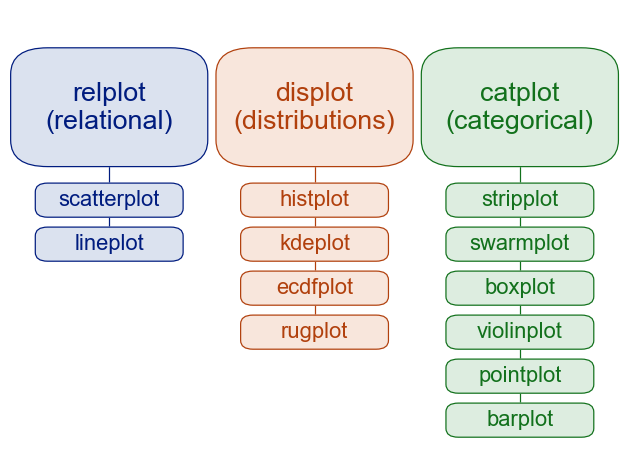

### **3.1. Relational plots**

In [87]:
tips = sns.load_dataset("tips")

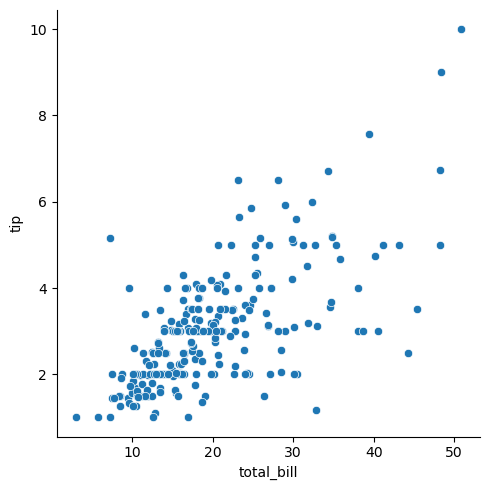

In [88]:
sns.relplot(data=tips, x="total_bill", y="tip")

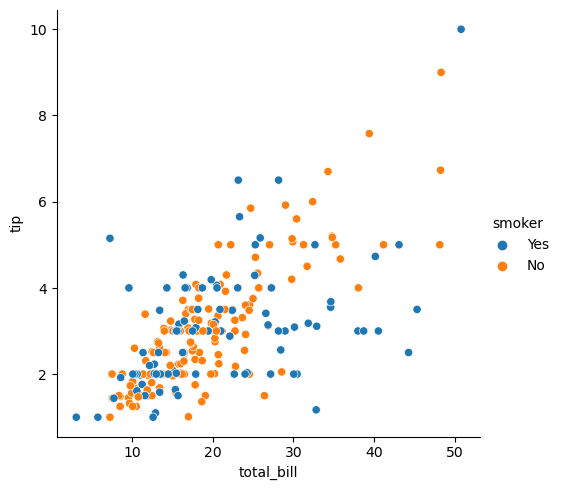

In [89]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

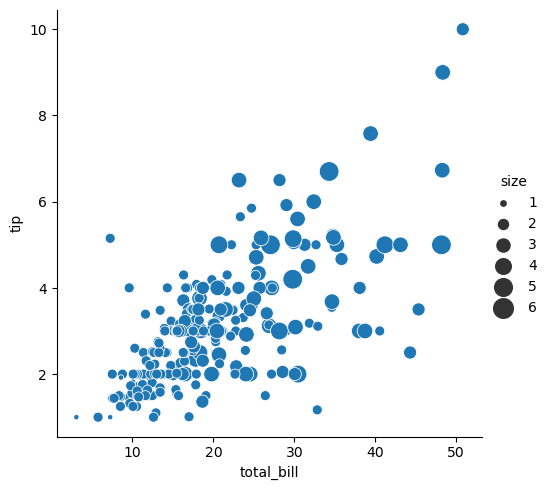

In [90]:
sns.relplot(data=tips, x="total_bill", y="tip",size="size", sizes=(15, 200))

In [93]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


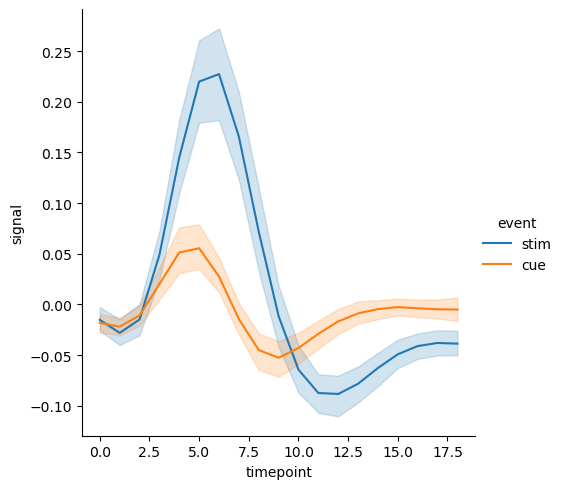

In [92]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", hue="event")

### **3.2. Distribution plots**

In [96]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


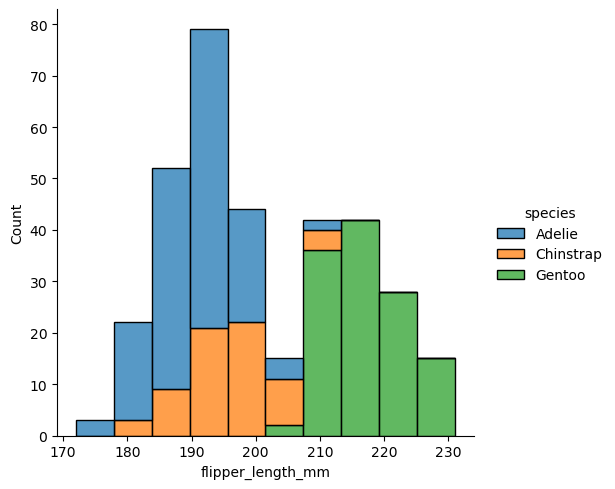

In [95]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

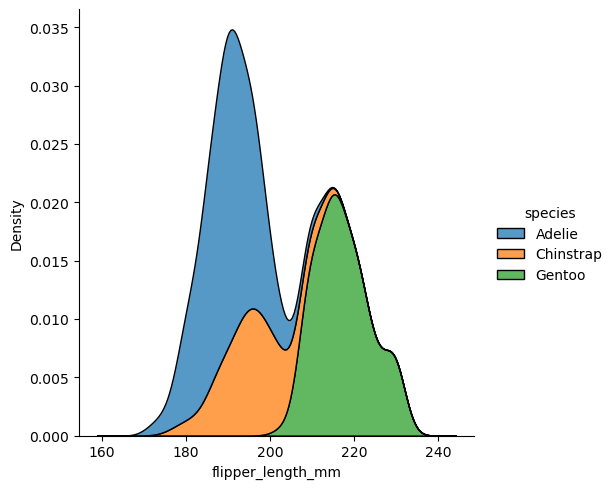

In [97]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

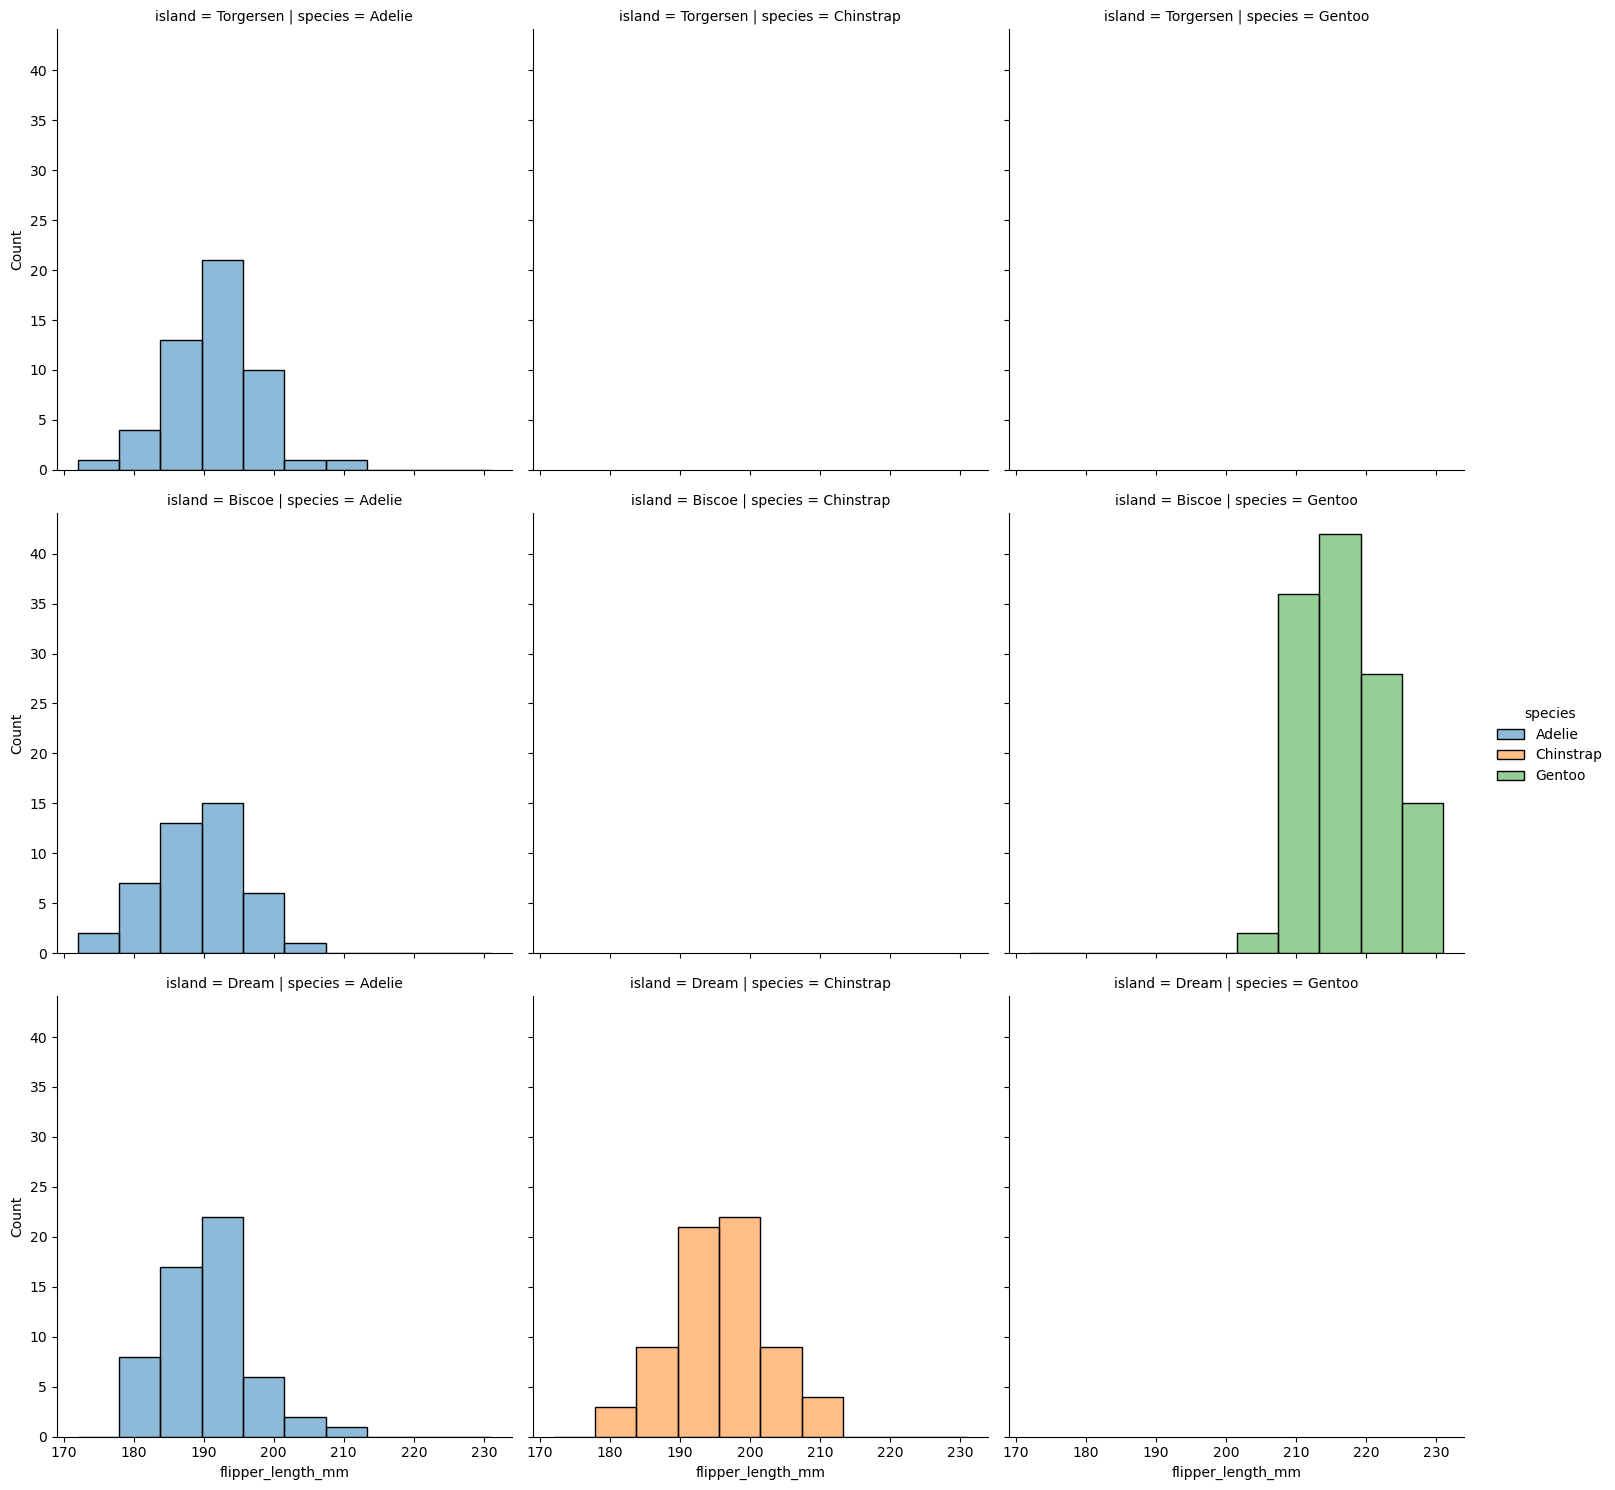

In [99]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species", row="island")

### **3.3. Categorical plots**

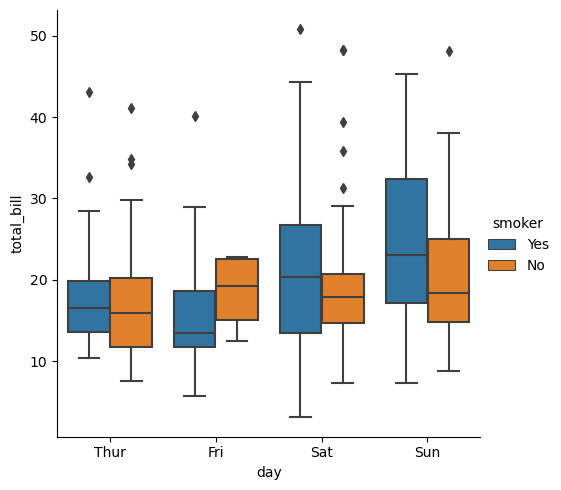

In [100]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

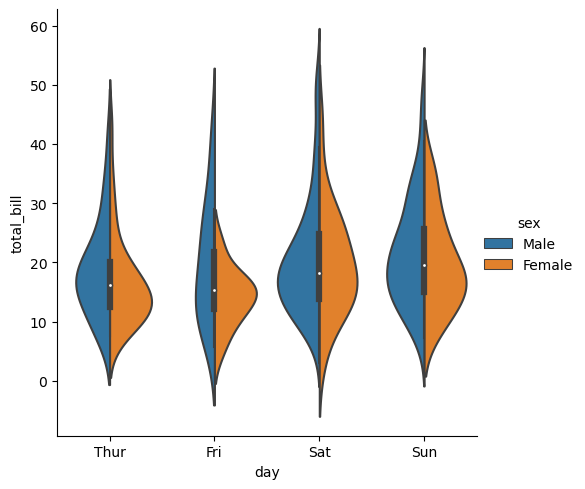

In [101]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex",kind="violin", split=True)

In [102]:
titanic = sns.load_dataset("titanic")

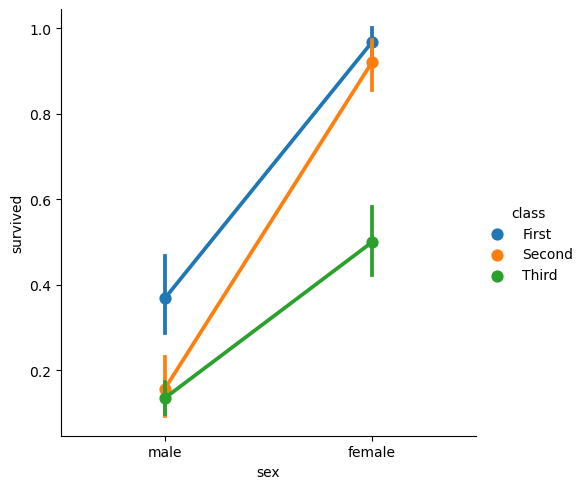

In [103]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

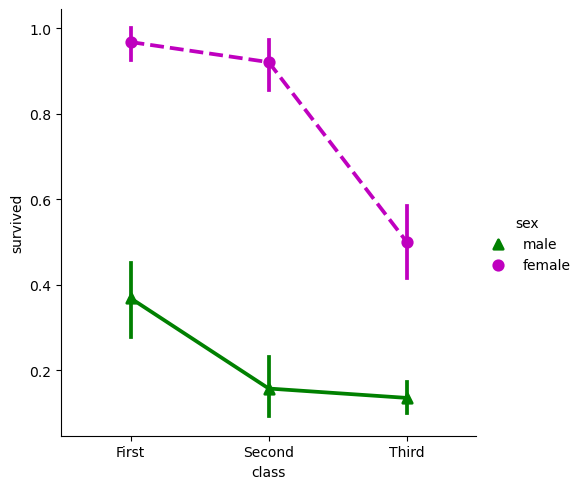

In [104]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

### **3.4. Multiview plots**

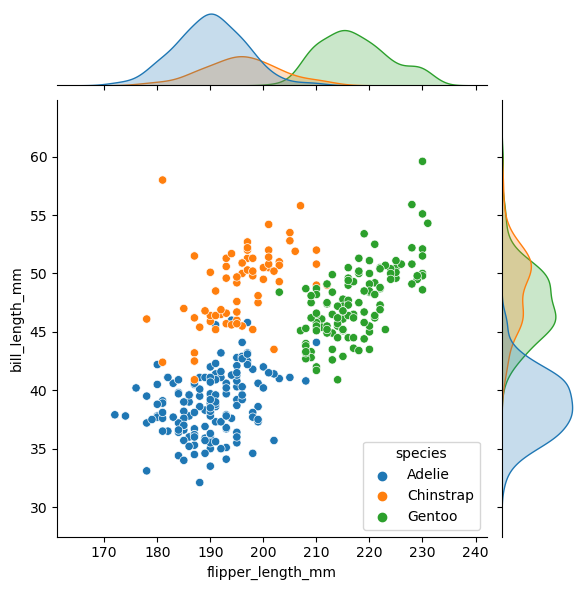

In [105]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

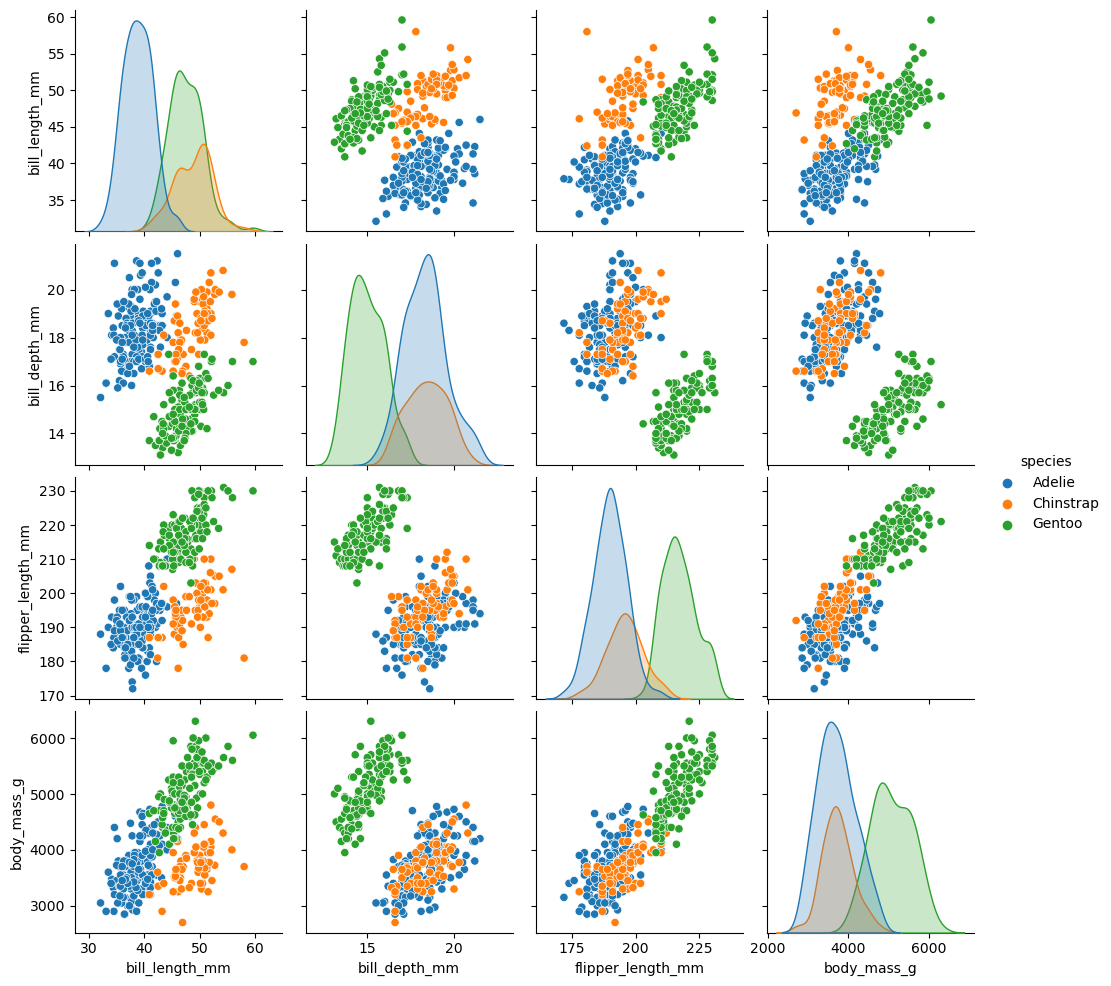

In [106]:
sns.pairplot(data=penguins, hue="species")

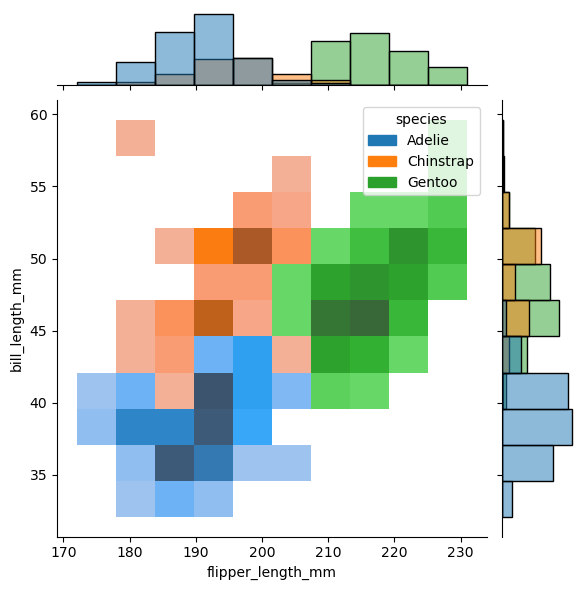

In [107]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

## **4. Análisis de datos**

## **4.1. Estadística descriptiva**

In [108]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
titanic.groupby('sex').describe()

survived                                              pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0  577.0  2.389948   

        ... parch        fare                                               \
        ...   75%  max  count       mean        std   min        25%   50%   
sex     ...                                                                  
female  ...   1.0  6.0  314.0  44.479818  57.997698  6.75  12.071875  23.0   
male    ...   0.0  5.0  577.0  25.523893  43.138263  0.00   7.895800  10.5   

                         
          75%       max  
sex                      
female  55.00  512.3292  
male    26.55  512.3292  

[2 rows x 48 columns]

In [110]:
titanic.groupby('pclass').describe()

survived                                                 age  \
          count      mean       std  min  25%  50%  75%  max  count   
pclass                                                                
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0  186.0   
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0  173.0   
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0  355.0   

                   ... parch        fare                                       \
             mean  ...   75%  max  count       mean        std  min       25%   
pclass             ...                                                          
1       38.233441  ...   0.0  4.0  216.0  84.154687  78.380373  0.0  30.92395   
2       29.877630  ...   1.0  3.0  184.0  20.662183  13.417399  0.0  13.00000   
3       25.140620  ...   0.0  6.0  491.0  13.675550  11.778142  0.0   7.75000   

                                 
            50%   75%       max  
pclass                           
1       60.2875  93.5  512.3292  
2       14.2500  26.0   73.5000  
3        8.0500  15.5   69.5500  

[3 rows x 40 columns]

In [111]:
titanic.groupby(['sex','pclass']).describe().T

sex                 female                               male              \
pclass                   1          2           3           1           2   
survived count   94.000000  76.000000  144.000000  122.000000  108.000000   
         mean     0.968085   0.921053    0.500000    0.368852    0.157407   
         std      0.176716   0.271448    0.501745    0.484484    0.365882   
         min      0.000000   0.000000    0.000000    0.000000    0.000000   
         25%      1.000000   1.000000    0.000000    0.000000    0.000000   
         50%      1.000000   1.000000    0.500000    0.000000    0.000000   
         75%      1.000000   1.000000    1.000000    1.000000    0.000000   
         max      1.000000   1.000000    1.000000    1.000000    1.000000   
age      count   85.000000  74.000000  102.000000  101.000000   99.000000   
         mean    34.611765  28.722973   21.750000   41.281386   30.740707   
         std     13.612052  12.872702   12.729964   15.139570   14.793894   
         min      2.000000   2.000000    0.750000    0.920000    0.670000   
         25%     23.000000  22.250000   14.125000   30.000000   23.000000   
         50%     35.000000  28.000000   21.500000   40.000000   30.000000   
         75%     44.000000  36.000000   29.750000   51.000000   36.750000   
         max     63.000000  57.000000   63.000000   80.000000   70.000000   
sibsp    count   94.000000  76.000000  144.000000  122.000000  108.000000   
         mean     0.553191   0.486842    0.895833    0.311475    0.342593   
         std      0.665865   0.642774    1.531573    0.546695    0.566380   
         min      0.000000   0.000000    0.000000    0.000000    0.000000   
         25%      0.000000   0.000000    0.000000    0.000000    0.000000   
         50%      0.000000   0.000000    0.000000    0.000000    0.000000   
         75%      1.000000   1.000000    1.000000    1.000000    1.000000   
         max      3.000000   3.000000    8.000000    3.000000    2.000000   
parch    count   94.000000  76.000000  144.000000  122.000000  108.000000   
         mean     0.457447   0.605263    0.798611    0.278689    0.222222   
         std      0.728305   0.833930    1.237976    0.658853    0.517603   
         min      0.000000   0.000000    0.000000    0.000000    0.000000   
         25%      0.000000   0.000000    0.000000    0.000000    0.000000   
         50%      0.000000   0.000000    0.000000    0.000000    0.000000   
         75%      1.000000   1.000000    1.000000    0.000000    0.000000   
         max      2.000000   3.000000    6.000000    4.000000    2.000000   
fare     count   94.000000  76.000000  144.000000  122.000000  108.000000   
         mean   106.125798  21.970121   16.118810   67.226127   19.741782   
         std     74.259988  10.891796   11.690314   77.548021   14.922235   
         min     25.929200  10.500000    6.750000    0.000000    0.000000   
         25%     57.244800  13.000000    7.854200   27.728100   12.331250   
         50%     82.664550  22.000000   12.475000   41.262500   13.000000   
         75%    134.500000  26.062500   20.221875   78.459375   26.000000   
         max    512.329200  65.000000   69.550000  512.329200   73.500000   

sex                         
pclass                   3  
survived count  347.000000  
         mean     0.135447  
         std      0.342694  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      0.000000  
         max      1.000000  
age      count  253.000000  
         mean    26.507589  
         std     12.159514  
         min      0.420000  
         25%     20.000000  
         50%     25.000000  
         75%     33.000000  
         max     74.000000  
sibsp    count  347.000000  
         mean     0.498559  
         std      1.288846  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      0.000000  
         max      8.000000  
parch    co

## **4.2. Inferencia estadística: t-test**

In [112]:
from scipy.stats import ttest_ind

cat1 = titanic[titanic['sex']=='male']
cat2 = titanic[titanic['sex']=='female']

ttest_ind(cat1['survived'], cat2['survived'])

Ttest_indResult(statistic=-19.297816550123354, pvalue=1.4060661308802594e-69)

In [113]:
from scipy.stats import ttest_ind
ttest_ind?

Signature:
ttest_ind(
    a,
    b,
    axis=0,
    equal_var=True,
    nan_policy='propagate',
    permutations=None,
    random_state=None,
    alternative='two-sided',
    trim=0,
)
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int or None, optional
    Axis along which to compute test. If None, compute over the whole
    arrays, `a`, and `b`.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
    population variance [2]_.

    .. versionadde

## **4.3. Inferencia estadística:  ANOVA de medidas repetidas**

Python permite múltiples análisis estadísticos. Veremos una pequeña muestra de la gran variedad de librerías y métodos estadísticos existentes. Recientemente se han incorporado varios métodos para hacer analisis de varianza de medidas repetidas. En este caso vamos a utilizar la librería pingouin para analizar un conjunto de datos simulado de un estudio longitudinal acerca de los efectos de la meditación en los resultados de una puntuación obtenida en un test.

Comenzamos leyendo el conjunto de datos del disco duro. Los datos están almacenados en un archivo csv, y utilizaremos la librería pandas para leerlo. Esta librería permite el manejo de tablas de datos, y es la base sobre la que trabaja la librería seaborn.

In [114]:
import pandas as pd
import pingouin as pg
import seaborn as sns

meditation = pd.read_csv('../datasets/meditation.csv')
meditation

,Unnamed: 0,Scores,Time,Group,Subject
0,0,5.971435,August,Control,0
1,1,4.309024,August,Control,1
2,2,6.932707,August,Control,2
3,3,5.187348,August,Control,3
4,4,4.779411,August,Control,4
...,...,...,...,...,...
175,175,6.176981,June,Meditation,55
176,176,8.523692,June,Meditation,56
177,177,6.522273,June,Meditation,57
178,178,4.990568,June,Meditation,58


In [115]:
!pip install pingouin

A continuación generamos una tabla con estadísticas descriptivas y representamos gráficamente

                   Unnamed: 0              Scores           Subject          
                         mean       std      mean       std    mean       std
Time    Group                                                                
August  Control          14.5  8.803408  5.508184  1.029795    14.5  8.803408
        Meditation      104.5  8.803408  5.332482  0.813022    44.5  8.803408
January Control          44.5  8.803408  5.603746  0.900437    14.5  8.803408
        Meditation      134.5  8.803408  5.970728  1.074590    44.5  8.803408
June    Control          74.5  8.803408  5.591624  1.179973    14.5  8.803408
        Meditation      164.5  8.803408  6.345328  0.933034    44.5  8.803408


<Axes: xlabel='Time', ylabel='Scores'>

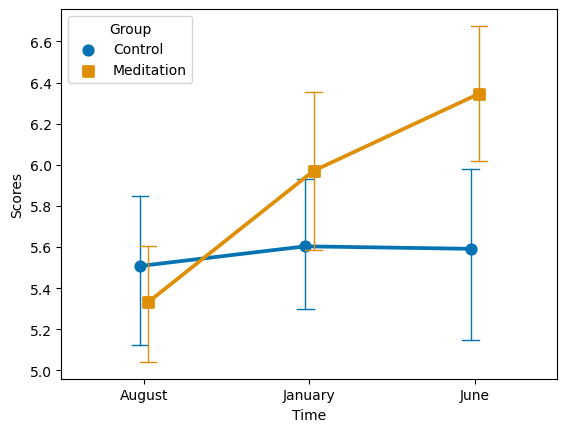

In [116]:
print(meditation.groupby(['Time', 'Group']).agg(['mean', 'std']))

sns.pointplot(data=meditation, x='Time', y='Scores', hue='Group', dodge=True,
              markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')

Gracias a que tanto pingouin como seaborn se basan en pandas, la sintaxis para expresar modelos estadísticos es muy similar a la que utilizamos para representar gráficamente los datos. Un sencillo e intuitivo comando nos permite realizar el ANOVA de medidas repetidas.

In [117]:
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group',
                     subject='Subject', data=meditation)
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        4.465      1     58  4.465  4.131    0.047  0.066  nan
Time         9.359      2    116  4.679  4.941    0.009  0.078    0.998
Interaction  6.539      2    116  3.270  3.452    0.035  0.056  nan



#### De manera similar, podemos realizar los análisis posthoc

In [118]:
posthocs = pg.pairwise_tests(dv='Scores', within='Time', between='Group',
                             subject='Subject', data=meditation)
pg.print_table(posthocs)


POST HOC TESTS

Contrast      Time     A        B           Paired    Parametric         T     dof  alternative      p-unc    BF10    hedges
------------  -------  -------  ----------  --------  ------------  ------  ------  -------------  -------  ------  --------
Time          -        August   January     True      True          -2.002  59.000  two-sided        0.050   0.908    -0.379
Time          -        August   June        True      True          -2.985  59.000  two-sided        0.004   7.594    -0.530
Time          -        January  June        True      True          -1.024  59.000  two-sided        0.310   0.232    -0.170
Group         -        Control  Meditation  False     True          -2.033  58.000  two-sided        0.047   1.447    -0.518
Time * Group  August   Control  Meditation  False     True           0.733  58.000  two-sided        0.466   0.329     0.187
Time * Group  January  Control  Meditation  False     True          -1.434  58.000  two-sided        0.157  

/opt/conda/lib/python3.10/site-packages/pingouin/pairwise.py:478: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index=False, observed=True, sort=True).mean()


## **4.4. Usando R desde ipython/jupyter notebooks**

In [119]:
import pandas as pd
data = pd.read_csv("../datasets/punch_data.csv").query("stim")
data_corr = data.query("correct").copy()
data_resp = data.query("answered").copy()

def remove_intercept_variance(x, group_median):
    return x - x.median() + group_median

data_corr.loc[:, "rt_within"] = data_corr.groupby("subj").rt.transform(
    remove_intercept_variance,
    data_corr.rt.median(),
)


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R 
library(lme4)
lr.test = function(m1, m2, name){
    print(summary(m1))
    out = anova(m1, m2)
    chi2 = out$Chisq[2]
    dof = out$"Chi Df"[2]
    p = out$"Pr(>Chisq)"[2]
    test_str = "\nLikelihood ratio test for %s:\n  Chisq(%d) = %.2f; p = %.3g"
    writeLines(sprintf(test_str, name, dof, chi2, p))
}

In [ ]:
%%R -i data
data$log.cpe = log(data$pe_context)
data.corr = data[data$correct,]
data.corr$log.cpe = log(data.corr$pe_context)
data.resp = data[data$answered,]
data.resp$log.cpe = log(data.resp$pe_context)
summary(data.resp)


In [ ]:
cpe_separation = pd.read_csv('../datasets/cpe_separation.csv')

In [ ]:
%R -i cpe_separation

In [ ]:
%%R
m <- lmer(dist ~ cpe + (cpe | subj), cpe_separation, subset=roi=="IFS")
m.null <- lmer(dist ~ 1 + (cpe | subj), cpe_separation, subset=roi=="IFS")
lr.test(m, m.null, "main effect of CPE on IFS pattern distance")

In [ ]:
%%R
library(dplyr)
summary(iris)


In [ ]:
%%R
library(ggplot2)
ggplot(data=iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + geom_point(size=3)

## **4.5. Cálculo simbólico**

Resolución de sistemas de ecuaciones lineales con sympy. En este ejemplo se calcula la solución al sistema de ecuaciones:  

   x + 4 y ==  2  
   
-2 x +   y == 14  

In [ ]:
from sympy import Matrix, solve_linear_system
from sympy.abc import x, y

system = Matrix(( (1, 4, 2), (-2, 1, 14)))
solve_linear_system(system, x, y)

Sympy tambien puede resolver ecuaciones diferenciales, como por ejemplo el oscilador armónico:  

In [ ]:
from sympy import Function, Eq, dsolve, symbols
from sympy import sin, cos, exp
from sympy.plotting import plot, plot3d

y = Function('y')
t, mu = symbols(['t','mu'])

equation = Eq(y(t).diff(t, t) + y(t), 0)
equation

In [ ]:
solution = dsolve(equation, y(t))
solution

In [ ]:
import numpy as np
plot1 = plot(show=False)
for c1 in np.linspace(-2,2,10):
    plotc1 = plot(solution.subs({'C1': c1, 'C2': 0.2}).rhs, (t, -10, 10), show=False)
    plot1.append(plotc1[0])
plot1.show()